In [ ]:
%matplotlib inline

from pathlib import Path

import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
import matplotlib.pylab as plt
!pip install dmba
from dmba import plotDecisionTree, classificationSummary, regressionSummary

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 11.8 MB 3.9 MB/s 
no display found. Using non-interactive Agg backend


In [ ]:
pd.set_option('display.max_columns', None)

**Importing cleaned file after EDA**

In [ ]:
fraud = pd.read_csv("fraud_cleaned.csv")
fraud.head()

,Unnamed: 0,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,Age,Fault,VehicleCategory,VehiclePrice,FraudFound_P,RepNumber,Deductible,DriverRating,Days_Policy_Accident,Days_Policy_Claim,PastNumberOfClaims,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy,Grouped_Make
0,0,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,Single,21.0,Policy Holder,Sport,79000,0,12,300,1,45,45,0,3,26 to 30,No,No,External,0,1.0,3.5,1994,Liability,Non-Luxury
1,1,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,Single,34.0,Policy Holder,Sport,79000,0,15,400,4,45,45,0,6,31 to 35,Yes,No,External,0,0.0,1.0,1994,Collision,Non-Luxury
2,2,Oct,5,Friday,Honda,Urban,Thursday,Nov,2,Male,Married,47.0,Policy Holder,Sport,79000,0,7,400,3,45,45,1,7,41 to 50,No,No,External,0,0.0,1.0,1994,Collision,Non-Luxury
3,3,Jun,2,Saturday,Toyota,Rural,Friday,Jul,1,Male,Married,65.0,Third Party,Sport,24500,0,4,400,2,45,45,1,8,51 to 65,Yes,No,External,6,0.0,1.0,1994,Liability,Non-Luxury
4,4,Jan,5,Monday,Honda,Urban,Tuesday,Feb,2,Female,Single,27.0,Third Party,Sport,79000,0,3,400,1,45,45,0,5,31 to 35,No,No,External,0,0.0,1.0,1994,Collision,Non-Luxury


In [ ]:
fraud = fraud.drop(columns = ["Unnamed: 0"])

In [ ]:
fraud.head()

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,Age,Fault,VehicleCategory,VehiclePrice,FraudFound_P,RepNumber,Deductible,DriverRating,Days_Policy_Accident,Days_Policy_Claim,PastNumberOfClaims,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy,Grouped_Make
0,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,Single,21.0,Policy Holder,Sport,79000,0,12,300,1,45,45,0,3,26 to 30,No,No,External,0,1.0,3.5,1994,Liability,Non-Luxury
1,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,Single,34.0,Policy Holder,Sport,79000,0,15,400,4,45,45,0,6,31 to 35,Yes,No,External,0,0.0,1.0,1994,Collision,Non-Luxury
2,Oct,5,Friday,Honda,Urban,Thursday,Nov,2,Male,Married,47.0,Policy Holder,Sport,79000,0,7,400,3,45,45,1,7,41 to 50,No,No,External,0,0.0,1.0,1994,Collision,Non-Luxury
3,Jun,2,Saturday,Toyota,Rural,Friday,Jul,1,Male,Married,65.0,Third Party,Sport,24500,0,4,400,2,45,45,1,8,51 to 65,Yes,No,External,6,0.0,1.0,1994,Liability,Non-Luxury
4,Jan,5,Monday,Honda,Urban,Tuesday,Feb,2,Female,Single,27.0,Third Party,Sport,79000,0,3,400,1,45,45,0,5,31 to 35,No,No,External,0,0.0,1.0,1994,Collision,Non-Luxury


In [ ]:
fraud.isnull().sum()

Month                   0
WeekOfMonth             0
DayOfWeek               0
Make                    0
AccidentArea            0
DayOfWeekClaimed        0
MonthClaimed            0
WeekOfMonthClaimed      0
Sex                     0
MaritalStatus           0
Age                     0
Fault                   0
VehicleCategory         0
VehiclePrice            0
FraudFound_P            0
RepNumber               0
Deductible              0
DriverRating            0
Days_Policy_Accident    0
Days_Policy_Claim       0
PastNumberOfClaims      0
AgeOfVehicle            0
AgeOfPolicyHolder       0
PoliceReportFiled       0
WitnessPresent          0
AgentType               0
NumberOfSuppliments     0
AddressChange_Claim     0
NumberOfCars            0
Year                    0
BasePolicy              0
Grouped_Make            0
dtype: int64

In [ ]:
fraud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15420 entries, 0 to 15419
Data columns (total 32 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Month                 15420 non-null  object 
 1   WeekOfMonth           15420 non-null  int64  
 2   DayOfWeek             15420 non-null  object 
 3   Make                  15420 non-null  object 
 4   AccidentArea          15420 non-null  object 
 5   DayOfWeekClaimed      15420 non-null  object 
 6   MonthClaimed          15420 non-null  object 
 7   WeekOfMonthClaimed    15420 non-null  int64  
 8   Sex                   15420 non-null  object 
 9   MaritalStatus         15420 non-null  object 
 10  Age                   15420 non-null  float64
 11  Fault                 15420 non-null  object 
 12  VehicleCategory       15420 non-null  object 
 13  VehiclePrice          15420 non-null  int64  
 14  FraudFound_P          15420 non-null  int64  
 15  RepNumber          

#Converting various columns to category

In [ ]:
fraud.RepNumber = fraud.RepNumber.astype("category")

In [ ]:
fraud.Year = fraud.Year.astype("category")

In [ ]:
fraud.WeekOfMonth = fraud.WeekOfMonth.astype("category")
fraud.WeekOfMonthClaimed = fraud.WeekOfMonthClaimed.astype("category")

In [ ]:
fraud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15420 entries, 0 to 15419
Data columns (total 32 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   Month                 15420 non-null  object  
 1   WeekOfMonth           15420 non-null  category
 2   DayOfWeek             15420 non-null  object  
 3   Make                  15420 non-null  object  
 4   AccidentArea          15420 non-null  object  
 5   DayOfWeekClaimed      15420 non-null  object  
 6   MonthClaimed          15420 non-null  object  
 7   WeekOfMonthClaimed    15420 non-null  category
 8   Sex                   15420 non-null  object  
 9   MaritalStatus         15420 non-null  object  
 10  Age                   15420 non-null  float64 
 11  Fault                 15420 non-null  object  
 12  VehicleCategory       15420 non-null  object  
 13  VehiclePrice          15420 non-null  int64   
 14  FraudFound_P          15420 non-null  int64   
 15  Re

#Creating Dummies and Train Test Split

In [ ]:
frauddf = pd.get_dummies(fraud, drop_first= True)
print(frauddf.shape)
frauddf.head()

(15420, 109)


,Age,VehiclePrice,FraudFound_P,Deductible,DriverRating,Days_Policy_Accident,Days_Policy_Claim,PastNumberOfClaims,AgeOfVehicle,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Month_Aug,Month_Dec,Month_Feb,Month_Jan,Month_Jul,Month_Jun,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,WeekOfMonth_2,WeekOfMonth_3,WeekOfMonth_4,WeekOfMonth_5,DayOfWeek_Monday,DayOfWeek_Saturday,DayOfWeek_Sunday,DayOfWeek_Thursday,DayOfWeek_Tuesday,DayOfWeek_Wednesday,Make_BMW,Make_Chevrolet,Make_Dodge,Make_Ferrari,Make_Ford,Make_Honda,Make_Jaguar,Make_Lexus,Make_Mazda,Make_Mecedes,Make_Mercury,Make_Nisson,Make_Pontiac,Make_Porche,Make_Saab,Make_Saturn,Make_Toyota,Make_VW,AccidentArea_Urban,DayOfWeekClaimed_Monday,DayOfWeekClaimed_Thursday,DayOfWeekClaimed_Tuesday,DayOfWeekClaimed_Wednesday,MonthClaimed_Aug,MonthClaimed_Dec,MonthClaimed_Feb,MonthClaimed_Jan,MonthClaimed_Jul,MonthClaimed_Jun,MonthClaimed_Mar,MonthClaimed_May,MonthClaimed_Nov,MonthClaimed_Oct,MonthClaimed_Sep,WeekOfMonthClaimed_2,WeekOfMonthClaimed_3,WeekOfMonthClaimed_4,WeekOfMonthClaimed_5,Sex_Male,MaritalStatus_Married,MaritalStatus_Single,MaritalStatus_Widow,Fault_Third Party,VehicleCategory_Sport,VehicleCategory_Utility,RepNumber_2,RepNumber_3,RepNumber_4,RepNumber_5,RepNumber_6,RepNumber_7,RepNumber_8,RepNumber_9,RepNumber_10,RepNumber_11,RepNumber_12,RepNumber_13,RepNumber_14,RepNumber_15,RepNumber_16,AgeOfPolicyHolder_18 to 20,AgeOfPolicyHolder_21 to 25,AgeOfPolicyHolder_26 to 30,AgeOfPolicyHolder_31 to 35,AgeOfPolicyHolder_36 to 40,AgeOfPolicyHolder_41 to 50,AgeOfPolicyHolder_51 to 65,AgeOfPolicyHolder_over 65,PoliceReportFiled_Yes,WitnessPresent_Yes,AgentType_Internal,Year_1995,Year_1996,BasePolicy_Collision,BasePolicy_Liability,Grouped_Make_Non-Luxury
0,21.0,79000,0,300,1,45,45,0,3,0,1.0,3.5,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1
1,34.0,79000,0,400,4,45,45,0,6,0,0.0,1.0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1
2,47.0,79000,0,400,3,45,45,1,7,0,0.0,1.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1
3,65.0,24500,0,400,2,45,45,1,8,6,0.0,1.0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,1
4,27.0,79000,0,400,1,45,45,0,5,0,0.0,1.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1


#Up sampling the data

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
X_up = frauddf.drop(columns = ['FraudFound_P'])
y_up = frauddf['FraudFound_P']

In [ ]:
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_up, y_up)

df_smote_over = pd.concat([pd.DataFrame(X_res), pd.DataFrame(y_res)], axis = 1)



In [ ]:
y_res.value_counts()

0    14497
1    14497
Name: FraudFound_P, dtype: int64

In [ ]:
df_smote_over

,Age,VehiclePrice,Deductible,DriverRating,Days_Policy_Accident,Days_Policy_Claim,PastNumberOfClaims,AgeOfVehicle,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Month_Aug,Month_Dec,Month_Feb,Month_Jan,Month_Jul,Month_Jun,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,WeekOfMonth_2,WeekOfMonth_3,WeekOfMonth_4,WeekOfMonth_5,DayOfWeek_Monday,DayOfWeek_Saturday,DayOfWeek_Sunday,DayOfWeek_Thursday,DayOfWeek_Tuesday,DayOfWeek_Wednesday,Make_BMW,Make_Chevrolet,Make_Dodge,Make_Ferrari,Make_Ford,Make_Honda,Make_Jaguar,Make_Lexus,Make_Mazda,Make_Mecedes,Make_Mercury,Make_Nisson,Make_Pontiac,Make_Porche,Make_Saab,Make_Saturn,Make_Toyota,Make_VW,AccidentArea_Urban,DayOfWeekClaimed_Monday,DayOfWeekClaimed_Thursday,DayOfWeekClaimed_Tuesday,DayOfWeekClaimed_Wednesday,MonthClaimed_Aug,MonthClaimed_Dec,MonthClaimed_Feb,MonthClaimed_Jan,MonthClaimed_Jul,MonthClaimed_Jun,MonthClaimed_Mar,MonthClaimed_May,MonthClaimed_Nov,MonthClaimed_Oct,MonthClaimed_Sep,WeekOfMonthClaimed_2,WeekOfMonthClaimed_3,WeekOfMonthClaimed_4,WeekOfMonthClaimed_5,Sex_Male,MaritalStatus_Married,MaritalStatus_Single,MaritalStatus_Widow,Fault_Third Party,VehicleCategory_Sport,VehicleCategory_Utility,RepNumber_2,RepNumber_3,RepNumber_4,RepNumber_5,RepNumber_6,RepNumber_7,RepNumber_8,RepNumber_9,RepNumber_10,RepNumber_11,RepNumber_12,RepNumber_13,RepNumber_14,RepNumber_15,RepNumber_16,AgeOfPolicyHolder_18 to 20,AgeOfPolicyHolder_21 to 25,AgeOfPolicyHolder_26 to 30,AgeOfPolicyHolder_31 to 35,AgeOfPolicyHolder_36 to 40,AgeOfPolicyHolder_41 to 50,AgeOfPolicyHolder_51 to 65,AgeOfPolicyHolder_over 65,PoliceReportFiled_Yes,WitnessPresent_Yes,AgentType_Internal,Year_1995,Year_1996,BasePolicy_Collision,BasePolicy_Liability,Grouped_Make_Non-Luxury,FraudFound_P
0,21.000000,79000,300,1,45,45,0,3,0,1.0,3.500000,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0
1,34.000000,79000,400,4,45,45,0,6,0,0.0,1.000000,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0
2,47.000000,79000,400,3,45,45,1,7,0,0.0,1.000000,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0
3,65.000000,24500,400,2,45,45,1,8,6,0.0,1.000000,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,1,0
4,27.000000,79000,400,1,45,45,0,5,0,0.0,1.000000,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28989,30.390941,24500,400,4,45,45,4,6,0,0.0,1.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,1
28990,56.607082,24500,400,1,45,45,0,7,0,0.0,1.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1
28991,65.780550,24500,400,3,45,45,0,8,6,0.0,2.849542,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0

In [ ]:
df_smote_over.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28994 entries, 0 to 28993
Columns: 109 entries, Age to FraudFound_P
dtypes: float64(3), int64(9), uint8(97)
memory usage: 5.3 MB


In [ ]:
X = df_smote_over.drop(columns = ['FraudFound_P'])
y = df_smote_over['FraudFound_P']
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size = 0.4, random_state = 1)

#Decision Trees 

*Running a full class decision tree with all the nodes.*

In [ ]:
import statsmodels.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
from sklearn import metrics

In [ ]:
classtreefull = DecisionTreeClassifier(random_state=1)
fulltree = classtreefull.fit(X_train,y_train)

In [ ]:
y_pred_gini = fulltree.predict(X_valid)

In [ ]:
print('Gini stats')
print("Accuracy:",metrics.accuracy_score(y_valid, y_pred_gini))
print("balanced_accuracy:",metrics.balanced_accuracy_score(y_valid, y_pred_gini))
print("brier_score_loss:",metrics.brier_score_loss(y_valid, y_pred_gini))
print("f1_score:",metrics.f1_score(y_valid,y_pred_gini))
print("recall_score:",metrics.recall_score(y_valid, y_pred_gini))
print("precision_score:",metrics.precision_score(y_valid, y_pred_gini))
print("roc_auc_score:",metrics.roc_auc_score(y_valid, y_pred_gini))

Gini stats
Accuracy: 0.9282634937058113
balanced_accuracy: 0.9286144874798528
brier_score_loss: 0.07173650629418865
f1_score: 0.9283746556473829
recall_score: 0.9474609031804604
precision_score: 0.910042194092827
roc_auc_score: 0.9286144874798526


In [ ]:
classificationSummary(y_train,classtreefull.predict(X_train))

Confusion Matrix (Accuracy 1.0000)

       Prediction
Actual    0    1
     0 8590    0
     1    0 8806


In [ ]:
classificationSummary(y_valid,classtreefull.predict(X_valid))

Confusion Matrix (Accuracy 0.9283)

       Prediction
Actual    0    1
     0 5374  533
     1  299 5392


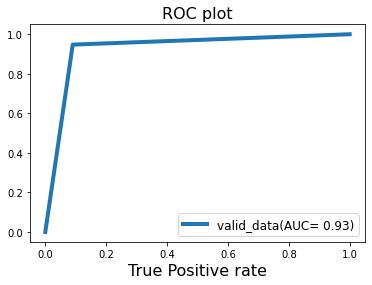

In [ ]:
y_pred_proba = fulltree.predict_proba(X_valid)[::,1]

auc = metrics.roc_auc_score(y_valid, y_pred_gini)

fpr1, tpr1, _ = metrics.roc_curve(y_valid, y_pred_proba)

plt.plot(fpr1, tpr1, label= "valid_data(AUC= %0.2f)" % auc, linewidth = 4)

plt.legend(prop={'size' : 12}, loc = "lower right")
plt.title('ROC plot', fontsize = 16)
plt.xlabel('False Positive rate', fontsize = 16)
plt.xlabel('True Positive rate', fontsize = 16)
plt.show()

*Running a decision tree with 5 nodes*

In [ ]:
classtree = DecisionTreeClassifier(random_state=1, max_depth=5)
tree = classtree.fit(X_train,y_train)

In [ ]:
y_pred_gini_tree = tree.predict(X_valid)

In [ ]:
print('Gini stats')
print("Accuracy:",metrics.accuracy_score(y_valid, y_pred_gini_tree))
print("balanced_accuracy:",metrics.balanced_accuracy_score(y_valid, y_pred_gini_tree))
print("brier_score_loss:",metrics.brier_score_loss(y_valid, y_pred_gini_tree))
print("f1_score:",metrics.f1_score(y_valid,y_pred_gini_tree))
print("recall_score:",metrics.recall_score(y_valid, y_pred_gini_tree))
print("precision_score:",metrics.precision_score(y_valid, y_pred_gini_tree))
print("roc_auc_score:",metrics.roc_auc_score(y_valid, y_pred_gini_tree))

Gini stats
Accuracy: 0.8321262286601138
balanced_accuracy: 0.83414498260197
brier_score_loss: 0.16787377133988618
f1_score: 0.8463905325443787
recall_score: 0.9425408539799683
precision_score: 0.7680412371134021
roc_auc_score: 0.8341449826019699


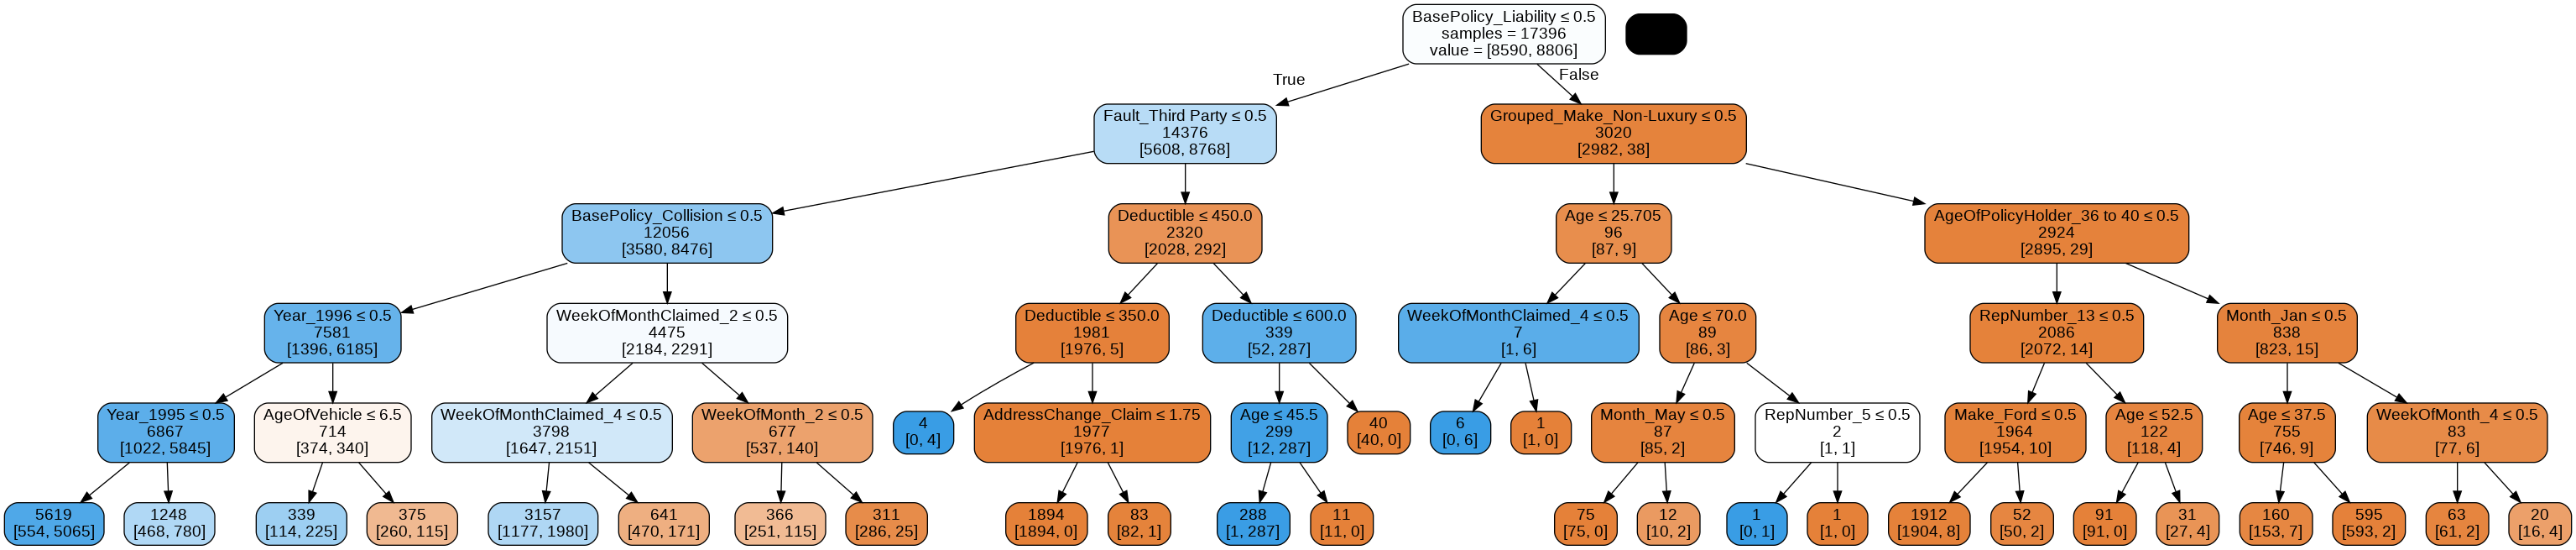

In [ ]:
plotDecisionTree(classtree,feature_names = X_train.columns)

In [ ]:
classificationSummary(y_train,classtree.predict(X_train))

Confusion Matrix (Accuracy 0.8407)

       Prediction
Actual    0    1
     0 6276 2314
     1  458 8348


In [ ]:
classificationSummary(y_valid,classtree.predict(X_valid))

Confusion Matrix (Accuracy 0.8321)

       Prediction
Actual    0    1
     0 4287 1620
     1  327 5364


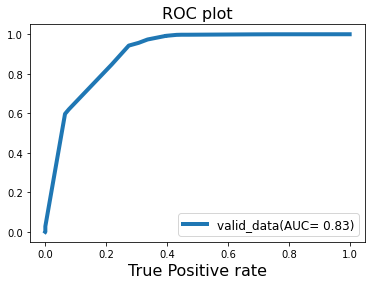

In [ ]:
y_pred_proba_tree= classtree.predict_proba(X_valid)[::,1]

auc_tree = metrics.roc_auc_score(y_valid, y_pred_gini_tree)

fpr2, tpr2, _ = metrics.roc_curve(y_valid, y_pred_proba_tree)

plt.plot(fpr2, tpr2, label= "valid_data(AUC= %0.2f)" % auc_tree, linewidth = 4)

plt.legend(prop={'size' : 12}, loc = "lower right")
plt.title('ROC plot', fontsize = 16)
plt.xlabel('False Positive rate', fontsize = 16)
plt.xlabel('True Positive rate', fontsize = 16)
plt.show()

#Regression Model

**Linear Regression** 

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
model = LinearRegression()
linearreg = model.fit(X_train,y_train)

In [ ]:
train_pred = model.predict(X_train)
train_pred

array([0.18388755, 0.05033977, 0.16646946, ..., 0.14659587, 0.26012361,
       0.13540785])

In [ ]:
regressionSummary(train_pred, y_train)


Regression statistics

                      Mean Error (ME) : 0.0000
       Root Mean Squared Error (RMSE) : 0.2116
            Mean Absolute Error (MAE) : 0.1399
          Mean Percentage Error (MPE) : 31.1880
Mean Absolute Percentage Error (MAPE) : 92.4730


In [ ]:
train_valid = model.predict(X_valid)
train_valid

array([0.58644336, 0.83218376, 0.03684229, ..., 0.67869112, 0.16459815,
       0.29035727])

In [ ]:
regressionSummary(train_valid, y_valid)


Regression statistics

                      Mean Error (ME) : 0.0060
       Root Mean Squared Error (RMSE) : 0.2114
            Mean Absolute Error (MAE) : 0.1417
          Mean Percentage Error (MPE) : 42.2429
Mean Absolute Percentage Error (MAPE) : 87.3163


**Forward Regression**

In [ ]:
from dmba import regressionSummary, classificationSummary
from dmba import  liftChart, gainsChart, adjusted_r2_score
from dmba import exhaustive_search, backward_elimination, forward_selection, AIC_score, BIC_score


In [ ]:
def train_model(variables):
    if len(variables) == 0:
        return None
    model = LinearRegression()
    model.fit(X_train[variables], y_train)
    return model

def score_model(model, variables):
    if len(variables) == 0:
        return AIC_score(y_train, [y_train.mean()] * len(y_train), model, df=1)
    return AIC_score(y_train, model.predict(X_train[variables]), model)

Forward_model, Forward_variables = forward_selection(X_train.columns, train_model, score_model, verbose=True)

print(Forward_variables)

Variables: Age, VehiclePrice, Deductible, DriverRating, Days_Policy_Accident, Days_Policy_Claim, PastNumberOfClaims, AgeOfVehicle, NumberOfSuppliments, AddressChange_Claim, NumberOfCars, Month_Aug, Month_Dec, Month_Feb, Month_Jan, Month_Jul, Month_Jun, Month_Mar, Month_May, Month_Nov, Month_Oct, Month_Sep, WeekOfMonth_2, WeekOfMonth_3, WeekOfMonth_4, WeekOfMonth_5, DayOfWeek_Monday, DayOfWeek_Saturday, DayOfWeek_Sunday, DayOfWeek_Thursday, DayOfWeek_Tuesday, DayOfWeek_Wednesday, Make_BMW, Make_Chevrolet, Make_Dodge, Make_Ferrari, Make_Ford, Make_Honda, Make_Jaguar, Make_Lexus, Make_Mazda, Make_Mecedes, Make_Mercury, Make_Nisson, Make_Pontiac, Make_Porche, Make_Saab, Make_Saturn, Make_Toyota, Make_VW, AccidentArea_Urban, DayOfWeekClaimed_Monday, DayOfWeekClaimed_Thursday, DayOfWeekClaimed_Tuesday, DayOfWeekClaimed_Wednesday, MonthClaimed_Aug, MonthClaimed_Dec, MonthClaimed_Feb, MonthClaimed_Jan, MonthClaimed_Jul, MonthClaimed_Jun, MonthClaimed_Mar, MonthClaimed_May, MonthClaimed_Nov, Mo

In [ ]:
regressionSummary(y_train, Forward_model.predict(X_train[Forward_variables]))


Regression statistics

               Mean Error (ME) : 0.0000
Root Mean Squared Error (RMSE) : 0.2116
     Mean Absolute Error (MAE) : 0.1400


In [ ]:
regressionSummary(y_valid, Forward_model.predict(X_valid[Forward_variables]))


Regression statistics

               Mean Error (ME) : -0.0060
Root Mean Squared Error (RMSE) : 0.2114
     Mean Absolute Error (MAE) : 0.1417


**Backward Regression**

In [ ]:
def train_model1(variables1):
    model1 = LinearRegression()
    model1.fit(X_train[variables1], y_train)
    return model1

def score_model1(model1, variables1):
    return AIC_score(y_train, model1.predict(X_train[variables1]), model1)

backward_model, backward_variables = backward_elimination(X_train.columns, train_model1, score_model1, verbose=True)

print(backward_variables)

Variables: Age, VehiclePrice, Deductible, DriverRating, Days_Policy_Accident, Days_Policy_Claim, PastNumberOfClaims, AgeOfVehicle, NumberOfSuppliments, AddressChange_Claim, NumberOfCars, Month_Aug, Month_Dec, Month_Feb, Month_Jan, Month_Jul, Month_Jun, Month_Mar, Month_May, Month_Nov, Month_Oct, Month_Sep, WeekOfMonth_2, WeekOfMonth_3, WeekOfMonth_4, WeekOfMonth_5, DayOfWeek_Monday, DayOfWeek_Saturday, DayOfWeek_Sunday, DayOfWeek_Thursday, DayOfWeek_Tuesday, DayOfWeek_Wednesday, Make_BMW, Make_Chevrolet, Make_Dodge, Make_Ferrari, Make_Ford, Make_Honda, Make_Jaguar, Make_Lexus, Make_Mazda, Make_Mecedes, Make_Mercury, Make_Nisson, Make_Pontiac, Make_Porche, Make_Saab, Make_Saturn, Make_Toyota, Make_VW, AccidentArea_Urban, DayOfWeekClaimed_Monday, DayOfWeekClaimed_Thursday, DayOfWeekClaimed_Tuesday, DayOfWeekClaimed_Wednesday, MonthClaimed_Aug, MonthClaimed_Dec, MonthClaimed_Feb, MonthClaimed_Jan, MonthClaimed_Jul, MonthClaimed_Jun, MonthClaimed_Mar, MonthClaimed_May, MonthClaimed_Nov, Mo

In [ ]:
regressionSummary(y_train, backward_model.predict(X_train[backward_variables]))


Regression statistics

               Mean Error (ME) : -0.0000
Root Mean Squared Error (RMSE) : 0.2116
     Mean Absolute Error (MAE) : 0.1400


In [ ]:
regressionSummary(y_valid, backward_model.predict(X_valid[backward_variables]))


Regression statistics

               Mean Error (ME) : -0.0060
Root Mean Squared Error (RMSE) : 0.2114
     Mean Absolute Error (MAE) : 0.1417


**Logistic Regresssion**

In [ ]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV

In [ ]:
logit_reg = LogisticRegression(solver='liblinear', C=1e42, random_state=1)
logit_reg.fit(X_train, y_train)

LogisticRegression(C=1e+42, random_state=1, solver='liblinear')

In [ ]:
print(pd.DataFrame({'coef': logit_reg.coef_[0]}, index=X.columns))

                             coef
Age                     -0.008672
VehiclePrice             0.000004
Deductible               0.004094
DriverRating            -0.050866
Days_Policy_Accident    -0.026444
...                           ...
Year_1995               -0.698958
Year_1996               -0.968373
BasePolicy_Collision    -0.560331
BasePolicy_Liability    -1.948701
Grouped_Make_Non-Luxury  0.007126

[108 rows x 1 columns]


In [ ]:
Coefficient = pd.DataFrame({'coef': logit_reg.coef_[0]}, index=X.columns)

In [ ]:
Best_coef = Coefficient.sort_values(by = "coef", ascending = False)

In [ ]:
Best_coef.head(10)

,coef
Days_Policy_Claim,0.160240
AgeOfPolicyHolder_21 to 25,0.111443
NumberOfCars,0.058998
Sex_Male,0.009229
Grouped_Make_Non-Luxury,0.007126
Deductible,0.004094
AddressChange_Claim,0.001833
AgeOfPolicyHolder_18 to 20,0.001234
Make_Mecedes,0.000683
VehiclePrice,0.000004


**Calculating the odds ratio**

In [ ]:
import math
print("Days_Policy_Claim_odds:", math.exp(0.160240))
print("AgeOfPolicyHolder_21to25_odds:",math.exp(0.111443))
print("NumberOfCars_odds:",math.exp(0.058998))
print("Sex_Male_odds:",math.exp(0.009229))
print("Grouped_Make_NonLuxury_odds:",math.exp(0.007126))
print("Deductible_odds:",math.exp(0.004094))
print("AddressChange_Claim_odds:",math.exp(0.001833))
print("AgeOfPolicyHolder_18to20_odds:",math.exp(0.001234))
print("Make_Mecedes_odds:",math.exp(0.000683))
print("VehiclePrice_odds:",math.exp(0.000004))

Days_Policy_Claim_odds: 1.1737925474006652
AgeOfPolicyHolder_21to25_odds: 1.1178900224582038
NumberOfCars_odds: 1.060773119191799
Sex_Male_odds: 1.0092717185358233
Grouped_Make_NonLuxury_odds: 1.0071514503551608
Deductible_odds: 1.004102391866192
AddressChange_Claim_odds: 1.0018346809714167
AgeOfPolicyHolder_18to20_odds: 1.001234761691277
Make_Mecedes_odds: 1.000683233297611
VehiclePrice_odds: 1.000004000008


In [ ]:
logit_reg_prob = logit_reg.predict_proba(X_valid)

In [ ]:
logit_reg_pred = logit_reg.predict(X_valid)

In [ ]:
print('Gini stats')
print("Accuracy:",metrics.accuracy_score(y_valid, logit_reg_pred))
print("balanced_accuracy:",metrics.balanced_accuracy_score(y_valid, logit_reg_pred))
print("brier_score_loss:",metrics.brier_score_loss(y_valid, logit_reg_pred))
print("f1_score:",metrics.f1_score(y_valid,logit_reg_pred))
print("recall_score:",metrics.recall_score(y_valid, logit_reg_pred))
print("precision_score:",metrics.precision_score(y_valid, logit_reg_pred))
print("roc_auc_score:",metrics.roc_auc_score(y_valid, logit_reg_pred))

Gini stats
Accuracy: 0.9558544576651147
balanced_accuracy: 0.9556046144514263
brier_score_loss: 0.044145542334885324
f1_score: 0.954432182271271
recall_score: 0.942189421894219
precision_score: 0.9669972948602344
roc_auc_score: 0.9556046144514264


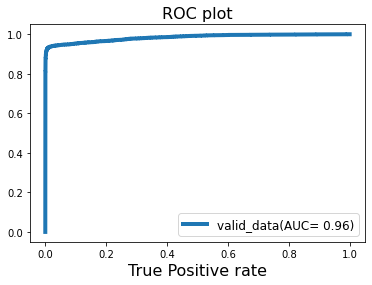

In [ ]:
logit_reg_prob_roc = logit_reg.predict_proba(X_valid)[::,1]
auc_logit = metrics.roc_auc_score(y_valid, logit_reg_pred)
fpr3, tpr3, _ = metrics.roc_curve(y_valid, logit_reg_prob_roc)
plt.plot(fpr3, tpr3, label= "valid_data(AUC= %0.2f)" % auc_logit, linewidth = 4)
plt.legend(prop={'size' : 12}, loc = "lower right")
plt.title('ROC plot', fontsize = 16)
plt.xlabel('False Positive rate', fontsize = 16)
plt.xlabel('True Positive rate', fontsize = 16)
plt.show()

In [ ]:
logit_result = pd.DataFrame({'actual' : y_valid,
                             'p_0' : [p[0] for p in logit_reg_prob],
                             'p_1' : [p[1] for p in logit_reg_prob],
                             'predicted': logit_reg_pred})
logit_result

,actual,p_0,p_1,predicted
14810,0,0.388145,0.611855,1
26866,1,0.056372,0.943628,1
3713,0,0.966477,0.033523,0
24587,1,0.013667,0.986333,1
12719,0,0.968427,0.031573,0
...,...,...,...,...
19197,1,0.004583,0.995417,1
12024,1,0.884033,0.115967,0
21830,1,0.131061,0.868939,1
3597,0,0.910532,0.089468,0


In [ ]:
classificationSummary(y_train, logit_reg.predict(X_train))

Confusion Matrix (Accuracy 0.9553)

       Prediction
Actual    0    1
     0 8338  252
     1  526 8280


In [ ]:
classificationSummary(y_valid, logit_reg.predict(X_valid))

Confusion Matrix (Accuracy 0.9559)

       Prediction
Actual    0    1
     0 5724  183
     1  329 5362


**Gains Chart**

In [ ]:
!pip install dmba
from dmba import classificationSummary, gainsChart, liftChart
from dmba.metric import AIC_score

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
Gains = logit_result.sort_values(by=['p_1'], ascending=False)
Gains

,actual,p_0,p_1,predicted
22406,1,0.000318,0.999682,1
16003,1,0.000390,0.999610,1
27773,1,0.000397,0.999603,1
28798,1,0.000450,0.999550,1
24501,1,0.000467,0.999533,1
...,...,...,...,...
11441,0,0.999879,0.000121,0
15112,0,0.999899,0.000101,0
13518,0,0.999900,0.000100,0
8243,0,0.999910,0.000090,0


*The following are the cummulative gains chart and decile lift chart for measuring the effectiveness of the models.* 

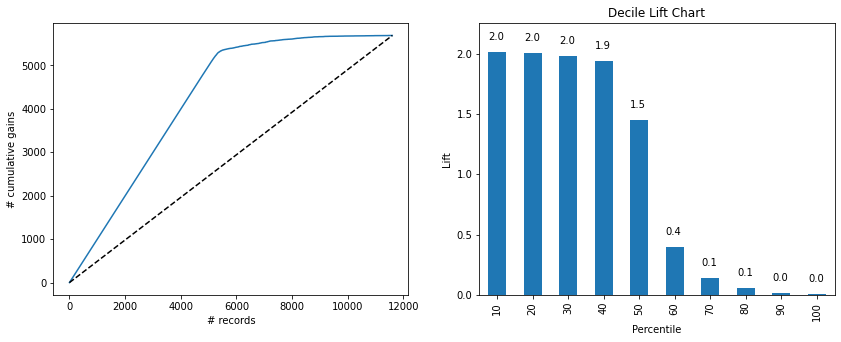

In [ ]:
fig, axes = plt.subplots(1,2, figsize=(14,5))
gainsChart(Gains.actual,ax=axes[0])
liftChart(Gains['p_1'],ax=axes[1])

**GridSearch Regression Tree and Randomforest**

*Setting the parameters for gridsearch classification*

In [ ]:
param_grid = {
    'max_depth' : [2,3,5,10],
    'min_samples_split' :[0.07,0.05,0.01,0.005],
    'min_impurity_decrease' : [0.05, 0.02, 0.01, 0.001]
}

In [ ]:
gridsearch = GridSearchCV(DecisionTreeClassifier(random_state=1), param_grid, cv=5, n_jobs= -1)
gridsearch.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=1), n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10],
                         'min_impurity_decrease': [0.05, 0.02, 0.01, 0.001],
                         'min_samples_split': [0.07, 0.05, 0.01, 0.005]})

In [ ]:
gridsearch.best_score_

0.8872150307427488

In [ ]:
gridsearch.best_estimator_

DecisionTreeClassifier(max_depth=10, min_impurity_decrease=0.001,
                       min_samples_split=0.005, random_state=1)

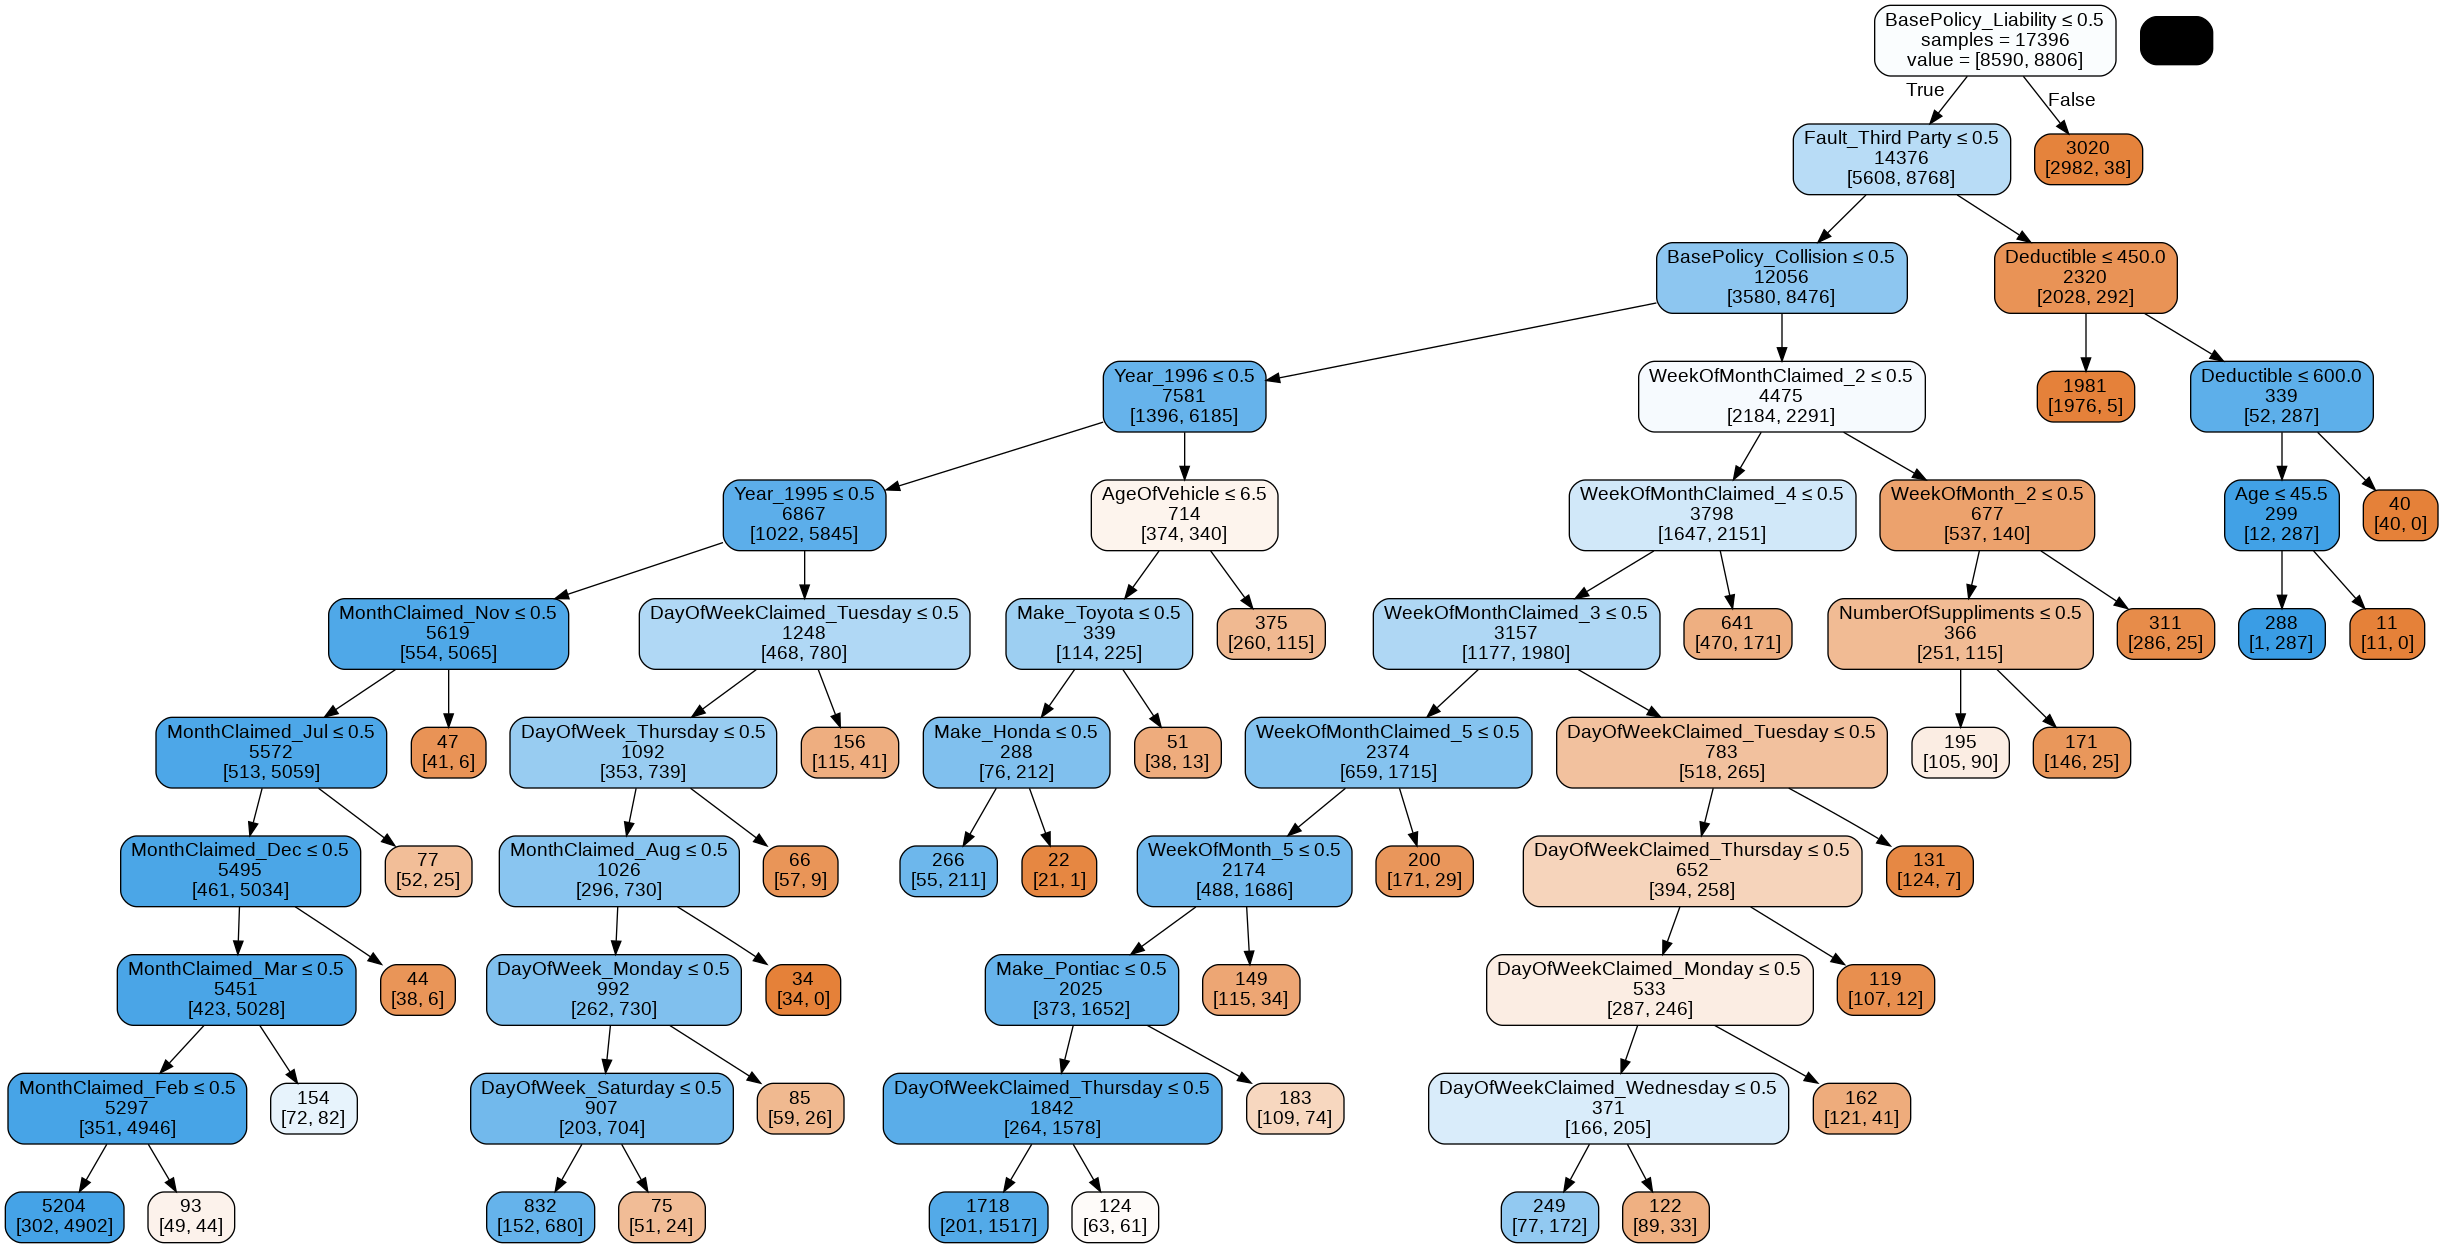

In [ ]:
gridsearchtree = gridsearch.best_estimator_
plotDecisionTree(gridsearchtree, feature_names = X_train.columns)

In [ ]:
regressionSummary(y_train, gridsearchtree.predict(X_train))


Regression statistics

               Mean Error (ME) : 0.0055
Root Mean Squared Error (RMSE) : 0.3230
     Mean Absolute Error (MAE) : 0.1043


In [ ]:
regressionSummary(y_valid, gridsearchtree.predict(X_valid))


Regression statistics

               Mean Error (ME) : 0.0008
Root Mean Squared Error (RMSE) : 0.3342
     Mean Absolute Error (MAE) : 0.1117


In [ ]:
classificationSummary(y_train, gridsearchtree.predict(X_train))

Confusion Matrix (Accuracy 0.8957)

       Prediction
Actual    0    1
     0 7730  860
     1  955 7851


In [ ]:
classificationSummary(y_valid, gridsearchtree.predict(X_valid))

Confusion Matrix (Accuracy 0.8883)

       Prediction
Actual    0    1
     0 5264  643
     1  652 5039


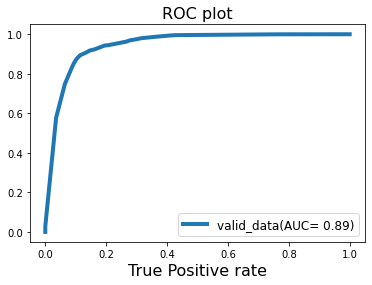

In [ ]:
y_pred_proba_grid= gridsearchtree.predict_proba(X_valid)[::,1]

y_pred_gini_grid = gridsearchtree.predict(X_valid)

auc_gridtree = metrics.roc_auc_score(y_valid, y_pred_gini_grid)

fpr4, tpr4, _ = metrics.roc_curve(y_valid, y_pred_proba_grid)

plt.plot(fpr4, tpr4, label= "valid_data(AUC= %0.2f)" % auc_gridtree, linewidth = 4)

plt.legend(prop={'size' : 12}, loc = "lower right")
plt.title('ROC plot', fontsize = 16)
plt.xlabel('False Positive rate', fontsize = 16)
plt.xlabel('True Positive rate', fontsize = 16)
plt.show()

In [ ]:
print('Gini stats')
print("Accuracy:",metrics.accuracy_score(y_valid, y_pred_gini_grid))
print("balanced_accuracy:",metrics.balanced_accuracy_score(y_valid, y_pred_gini_grid))
print("brier_score_loss:",metrics.brier_score_loss(y_valid, y_pred_gini_grid))
print("f1_score:",metrics.f1_score(y_valid,y_pred_gini_grid))
print("recall_score:",metrics.recall_score(y_valid, y_pred_gini_grid))
print("precision_score:",metrics.precision_score(y_valid, y_pred_gini_grid))
print("roc_auc_score:",metrics.roc_auc_score(y_valid, y_pred_gini_grid))

Gini stats
Accuracy: 0.8883428177271944
balanced_accuracy: 0.8882896189478473
brier_score_loss: 0.11165718227280566
f1_score: 0.8861338257276005
recall_score: 0.8854331400456862
precision_score: 0.8868356212601197
roc_auc_score: 0.8882896189478472


#Random Forest

In [ ]:
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier

In [ ]:
random_forest = RandomForestClassifier(random_state=1, n_estimators=500)
random_forest.fit(X_train, y_train)

RandomForestClassifier(n_estimators=500, random_state=1)

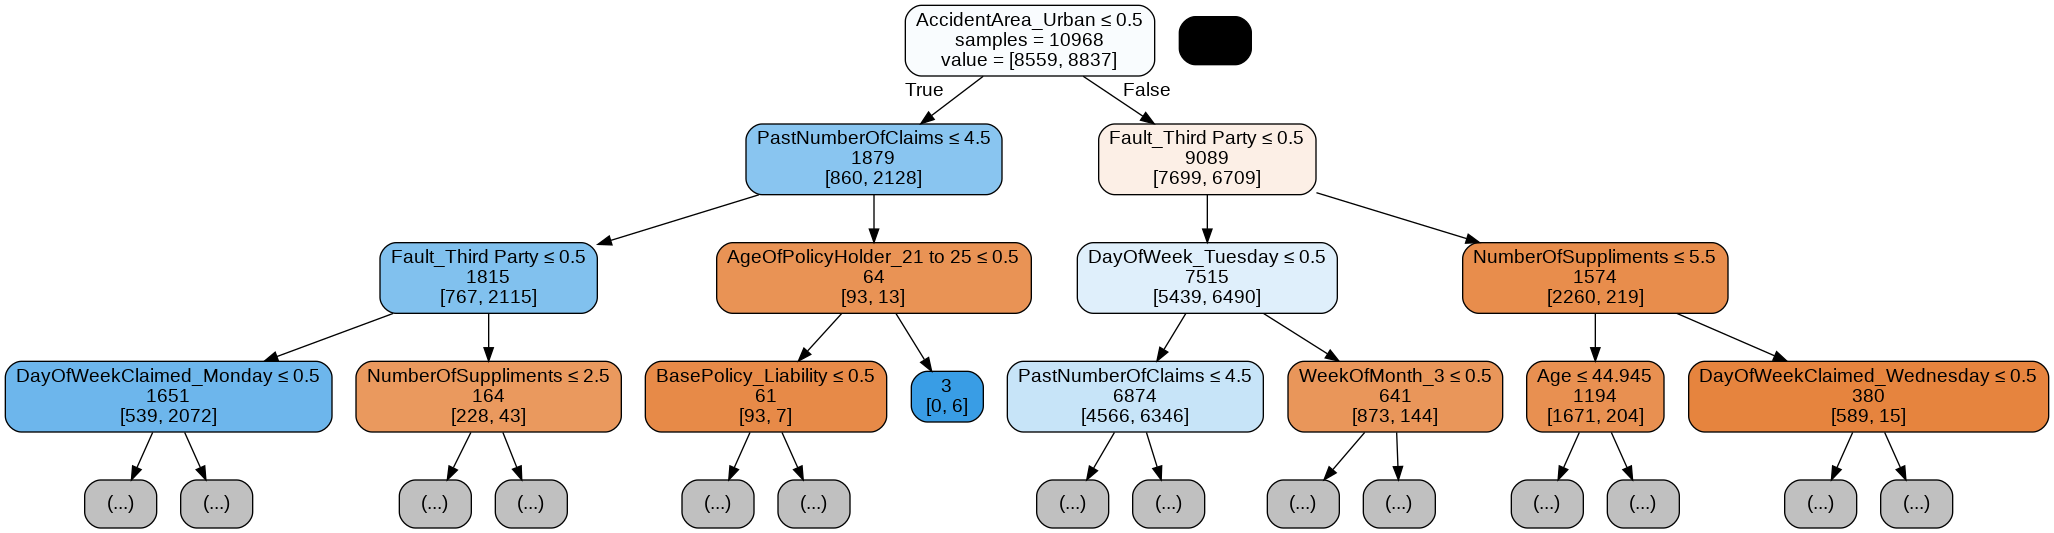

In [ ]:
randomforest = random_forest.estimators_[3]
plotDecisionTree(randomforest, feature_names = X_train.columns, max_depth=3)

**Calculating the importance of each variable for randomforest**

In [ ]:
importance = random_forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in random_forest.estimators_], axis= 0)

In [ ]:
random_forest_df = pd.DataFrame({"feature" : X_train.columns,
                                 "importance" : importance,
                                 "Std" : std})
print(random_forest_df.sort_values("importance", ascending = False))

                   feature  importance       Std
106   BasePolicy_Liability    0.092351  0.074845
74       Fault_Third Party    0.075527  0.033614
75   VehicleCategory_Sport    0.064569  0.065793
104              Year_1996    0.029257  0.022171
103              Year_1995    0.028551  0.022459
..                     ...         ...       ...
41            Make_Mecedes    0.000026  0.000093
45             Make_Porche    0.000015  0.000077
38             Make_Jaguar    0.000011  0.000056
35            Make_Ferrari    0.000007  0.000046
39              Make_Lexus    0.000004  0.000033

[108 rows x 3 columns]


In [ ]:
classificationSummary(y_train, random_forest.predict(X_train))

Confusion Matrix (Accuracy 1.0000)

       Prediction
Actual    0    1
     0 8590    0
     1    0 8806


In [ ]:
classificationSummary(y_valid, random_forest.predict(X_valid))

Confusion Matrix (Accuracy 0.9677)

       Prediction
Actual    0    1
     0 5850   57
     1  318 5373


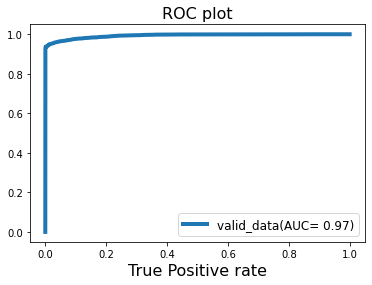

In [ ]:
y_pred_proba_rf= random_forest.predict_proba(X_valid)[::,1]

y_pred_gini_rf = random_forest.predict(X_valid)

auc_rf = metrics.roc_auc_score(y_valid, y_pred_gini_rf)

fpr5, tpr5, _ = metrics.roc_curve(y_valid, y_pred_proba_rf)

plt.plot(fpr5, tpr5, label= "valid_data(AUC= %0.2f)" % auc_rf, linewidth = 4)

plt.legend(prop={'size' : 12}, loc = "lower right")
plt.title('ROC plot', fontsize = 16)
plt.xlabel('False Positive rate', fontsize = 16)
plt.xlabel('True Positive rate', fontsize = 16)
plt.show()

In [ ]:
print('Gini stats')
print("Accuracy:",metrics.accuracy_score(y_valid, y_pred_gini_rf))
print("balanced_accuracy:",metrics.balanced_accuracy_score(y_valid, y_pred_gini_rf))
print("brier_score_loss:",metrics.brier_score_loss(y_valid, y_pred_gini_rf))
print("f1_score:",metrics.f1_score(y_valid,y_pred_gini_rf))
print("recall_score:",metrics.recall_score(y_valid, y_pred_gini_rf))
print("precision_score:",metrics.precision_score(y_valid, y_pred_gini_rf))
print("roc_auc_score:",metrics.roc_auc_score(y_valid, y_pred_gini_rf))

Gini stats
Accuracy: 0.9676668391101914
balanced_accuracy: 0.9672363650285274
brier_score_loss: 0.03233316088980859
f1_score: 0.9662800107903965
recall_score: 0.9441222983658408
precision_score: 0.9895027624309393
roc_auc_score: 0.9672363650285273


#Neural Networks

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neural_network import MLPClassifier, MLPRegressor

In [ ]:
clf=MLPClassifier(hidden_layer_sizes=40, activation='relu',solver='adam',random_state=1,max_iter=1000)
clf.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=40, max_iter=1000, random_state=1)

In [ ]:
classificationSummary(y_train, clf.predict(X_train))

Confusion Matrix (Accuracy 0.9413)

       Prediction
Actual    0    1
     0 8028  562
     1  460 8346


In [ ]:
classificationSummary(y_valid, clf.predict(X_valid))

Confusion Matrix (Accuracy 0.9402)

       Prediction
Actual    0    1
     0 5509  398
     1  295 5396


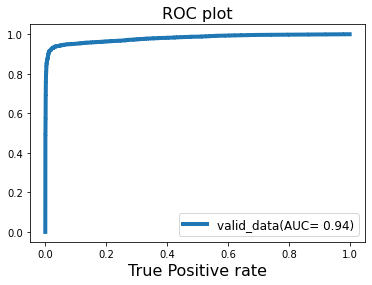

In [ ]:
y_pred_proba_clf= clf.predict_proba(X_valid)[::,1]

y_pred_gini_clf = clf.predict(X_valid)

auc_clf = metrics.roc_auc_score(y_valid, y_pred_gini_clf)

fpr5, tpr5, _ = metrics.roc_curve(y_valid, y_pred_proba_clf)

plt.plot(fpr5, tpr5, label= "valid_data(AUC= %0.2f)" % auc_clf, linewidth = 4)

plt.legend(prop={'size' : 12}, loc = "lower right")
plt.title('ROC plot', fontsize = 16)
plt.xlabel('False Positive rate', fontsize = 16)
plt.xlabel('True Positive rate', fontsize = 16)
plt.show()

In [ ]:
print('Gini stats')
print("Accuracy:",metrics.accuracy_score(y_valid, y_pred_gini_clf))
print("balanced_accuracy:",metrics.balanced_accuracy_score(y_valid, y_pred_gini_clf))
print("brier_score_loss:",metrics.brier_score_loss(y_valid, y_pred_gini_clf))
print("f1_score:",metrics.f1_score(y_valid,y_pred_gini_clf))
print("recall_score:",metrics.recall_score(y_valid, y_pred_gini_clf))
print("precision_score:",metrics.precision_score(y_valid, y_pred_gini_clf))
print("roc_auc_score:",metrics.roc_auc_score(y_valid, y_pred_gini_clf))

Gini stats
Accuracy: 0.9402483186756337
balanced_accuracy: 0.94039303993127
brier_score_loss: 0.05975168132436627
f1_score: 0.9396604266434481
recall_score: 0.9481637673519593
precision_score: 0.9313082499137039
roc_auc_score: 0.9403930399312701


#NN with 52 Hidden layers

In [ ]:
clf1 = MLPClassifier(hidden_layer_sizes=52,activation='relu',solver='adam',random_state=1,
                    max_iter=1000)
clf1.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=52, max_iter=1000, random_state=1)

In [ ]:
classificationSummary(y_train,(clf1.predict(X_train)))

Confusion Matrix (Accuracy 0.8009)

       Prediction
Actual    0    1
     0 8568   22
     1 3442 5364


In [ ]:
classificationSummary(y_valid, clf1.predict(X_valid))

Confusion Matrix (Accuracy 0.8064)

       Prediction
Actual    0    1
     0 5882   25
     1 2220 3471


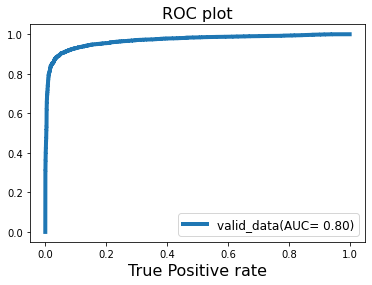

In [ ]:
y_pred_proba_clf1= clf1.predict_proba(X_valid)[::,1]

y_pred_gini_clf1 = clf1.predict(X_valid)

auc_clf1 = metrics.roc_auc_score(y_valid, y_pred_gini_clf1)

fpr6, tpr6, _ = metrics.roc_curve(y_valid, y_pred_proba_clf1)

plt.plot(fpr6, tpr6, label= "valid_data(AUC= %0.2f)" % auc_clf1, linewidth = 4)

plt.legend(prop={'size' : 12}, loc = "lower right")
plt.title('ROC plot', fontsize = 16)
plt.xlabel('False Positive rate', fontsize = 16)
plt.xlabel('True Positive rate', fontsize = 16)
plt.show()

In [ ]:
print('Gini stats')
print("Accuracy:",metrics.accuracy_score(y_valid, y_pred_gini_clf1))
print("balanced_accuracy:",metrics.balanced_accuracy_score(y_valid, y_pred_gini_clf1))
print("brier_score_loss:",metrics.brier_score_loss(y_valid, y_pred_gini_clf1))
print("f1_score:",metrics.f1_score(y_valid,y_pred_gini_clf1))
print("recall_score:",metrics.recall_score(y_valid, y_pred_gini_clf1))
print("precision_score:",metrics.precision_score(y_valid, y_pred_gini_clf1))
print("roc_auc_score:",metrics.roc_auc_score(y_valid, y_pred_gini_clf1))

Gini stats
Accuracy: 0.8064321434730126
balanced_accuracy: 0.8028390590080173
brier_score_loss: 0.1935678565269874
f1_score: 0.7556329596168497
recall_score: 0.6099103848181339
precision_score: 0.9928489702517163
roc_auc_score: 0.8028390590080173


**Neural Network with 45 hidden layers**

In [ ]:
clf2 = MLPClassifier(hidden_layer_sizes=45,activation='relu',solver='adam',random_state=1,
                    max_iter=1000)
clf2.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=45, max_iter=1000, random_state=1)

In [ ]:
classificationSummary(y_train,(clf2.predict(X_train)))

Confusion Matrix (Accuracy 0.9453)

       Prediction
Actual    0    1
     0 8107  483
     1  469 8337


In [ ]:
classificationSummary(y_valid,(clf2.predict(X_valid)))

Confusion Matrix (Accuracy 0.9430)

       Prediction
Actual    0    1
     0 5544  363
     1  298 5393


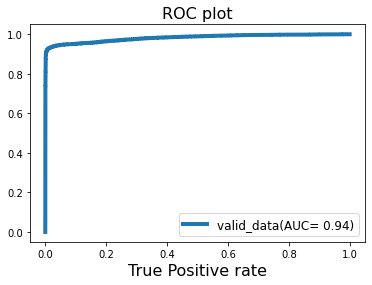

In [ ]:
y_pred_proba_clf2= clf2.predict_proba(X_valid)[::,1]

y_pred_gini_clf2 = clf2.predict(X_valid)

auc_clf2 = metrics.roc_auc_score(y_valid, y_pred_gini_clf2)

fpr7, tpr7, _ = metrics.roc_curve(y_valid, y_pred_proba_clf2)

plt.plot(fpr7, tpr7, label= "valid_data(AUC= %0.2f)" % auc_clf2, linewidth = 4)

plt.legend(prop={'size' : 12}, loc = "lower right")
plt.title('ROC plot', fontsize = 16)
plt.xlabel('False Positive rate', fontsize = 16)
plt.xlabel('True Positive rate', fontsize = 16)
plt.show()

In [ ]:
print('Gini stats')
print("Accuracy:",metrics.accuracy_score(y_valid, y_pred_gini_clf2))
print("balanced_accuracy:",metrics.balanced_accuracy_score(y_valid, y_pred_gini_clf2))
print("brier_score_loss:",metrics.brier_score_loss(y_valid, y_pred_gini_clf2))
print("f1_score:",metrics.f1_score(y_valid,y_pred_gini_clf2))
print("recall_score:",metrics.recall_score(y_valid, y_pred_gini_clf2))
print("precision_score:",metrics.precision_score(y_valid, y_pred_gini_clf2))
print("roc_auc_score:",metrics.roc_auc_score(y_valid, y_pred_gini_clf2))

Gini stats
Accuracy: 0.943007415071564
balanced_accuracy: 0.9430920526284273
brier_score_loss: 0.05699258492843594
f1_score: 0.9422556128243207
recall_score: 0.9476366192233351
precision_score: 0.9369353717859624
roc_auc_score: 0.9430920526284272


**This came out to be the best modelling process as for the best model (Logistic Regression) it has the lowest number of false negatives that 328 among all models.**